In [206]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys

sys.path.append('../')

from util.dataframe_utils import analyse_columns

In [207]:
df = pd.read_csv('../data/unprocessed/Tweets.csv')
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

,tweet_id,airline_sentiment_confidence,negativereason_confidence,retweet_count
count,1.464000e+04,14640.000000,10522.000000,14640.000000
mean,5.692184e+17,0.900169,0.638298,0.082650
std,7.791112e+14,0.162830,0.330440,0.745778
min,5.675883e+17,0.335000,0.000000,0.000000
25%,5.685592e+17,0.692300,0.360600,0.000000
50%,5.694779e+17,1.000000,0.670600,0.000000
75%,5.698905e+17,1.000000,1.000000,0.000000
max,5.703106e+17,1.000000,1.000000,44.000000


In [208]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [209]:
# some initial data integrity analysis

analyse_columns(df)

,Column,Data Type,Missing Values,Missing Ratio (%),Unique Values
0,tweet_id,int64,0,0.00%,14485
1,airline_sentiment,object,0,0.00%,3
2,airline_sentiment_confidence,float64,0,0.00%,1023
3,negativereason,object,5462,37.31%,10
4,negativereason_confidence,float64,4118,28.13%,1410
5,airline,object,0,0.00%,6
6,airline_sentiment_gold,object,14600,99.73%,3
7,name,object,0,0.00%,7701
8,negativereason_gold,object,14608,99.78%,13
9,retweet_count,int64,0,0.00%,18


Initial Observations:

- Strong Classifiers: Fields like `airline_sentiment` and `airline` exhibit no missing values and a limited range of unique values, making them robust classifiers for modeling purposes.

- Negative Sentiment Analysis: The `negativereason` field, despite a relatively small set of unique values against its missing values, is pertinent solely to negative sentiments. This specificity might skew the apparent ratio of missing data. However, for detailed analysis focusing on negative sentiments, this field, along with `negativereason_confidence`, remains valuable.

- Limited Utility of Certain Fields: The `name` and `tweet_id` fields are likely of limited value for a minimal model. The `tweet_id` has undergone several changes, diminishing its reliability as a source of metadata. Unless supplemented with additional data from Twitter's API, its utility is minimal. Similarly, `name`, being a user-defined unique identifier, offers limited correlation to the user's airline experience. Notably, the count of unique names is approximately half that of unique tweet IDs, indicating a substantial number of tweets from repeat users.

- Geographical Insights: The `user_timezone` and `tweet_location` fields are instrumental for user profiling, potentially revealing sentiment trends across different geographical areas.

- Time Series Analysis: The `tweet_created` field is devoid of missing values and is invaluable for time series analysis, offering insights into how sentiments evolve over time.

- High Missing Values: `airline_sentiment_gold` and `negativereason_gold` exhibit missing values in the upper 99th percentile, while 'tweet_coord' shows missing values in the upper 93rd percentile. Due to their minimal informational content and the impracticality of imputing such a high volume of missing instances, these columns are omitted from the analysis.

In [210]:
df = df.drop(['airline_sentiment_gold', 'negativereason_gold', 'tweet_coord'], axis=1)

# let's also rename the negative reason fields for consistency

df = df.rename(columns={'negativereason': 'negative_reason', 
                        'negativereason_confidence': 'negative_reason_confidence'})


In [211]:
# time to explore the individual fields in more depth

analyse_columns(df)

,Column,Data Type,Missing Values,Missing Ratio (%),Unique Values
0,tweet_id,int64,0,0.00%,14485
1,airline_sentiment,object,0,0.00%,3
2,airline_sentiment_confidence,float64,0,0.00%,1023
3,negative_reason,object,5462,37.31%,10
4,negative_reason_confidence,float64,4118,28.13%,1410
5,airline,object,0,0.00%,6
6,name,object,0,0.00%,7701
7,retweet_count,int64,0,0.00%,18
8,text,object,0,0.00%,14427
9,tweet_created,object,0,0.00%,14247


In [212]:
df['airline_sentiment'].unique()

array(['neutral', 'positive', 'negative'], dtype=object)

14640


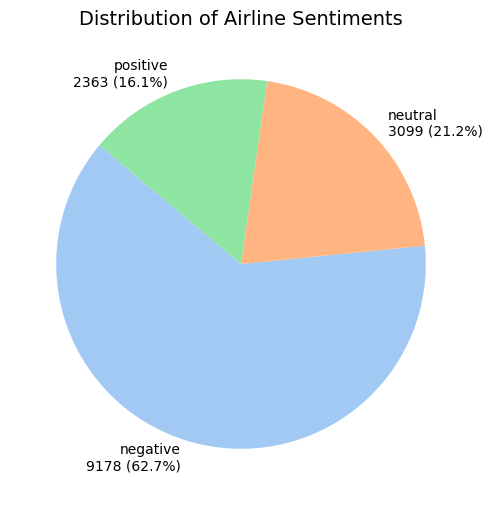

In [213]:
sentiment_counts = df['airline_sentiment'].value_counts()
labels = sentiment_counts.index
counts = sentiment_counts.values
total = sum(counts)
labels_with_counts = [f'{label}\n{count} ({(count/total)*100:.1f}%)' for label, count in zip(labels, counts)]

print(total)

plt.figure(figsize=(8, 6))
plt.pie(counts, labels=labels_with_counts, startangle=140, colors=sns.color_palette('pastel'))
plt.title('Distribution of Airline Sentiments', fontsize=14)
plt.show()

In [214]:
df['negative_reason'].unique()

array([nan, 'Bad Flight', "Can't Tell", 'Late Flight',
       'Customer Service Issue', 'Flight Booking Problems',
       'Lost Luggage', 'Flight Attendant Complaints', 'Cancelled Flight',
       'Damaged Luggage', 'longlines'], dtype=object)

In [215]:
negative_sentiments = df[df['airline_sentiment'] == 'negative']
count_no_reason = negative_sentiments['negative_reason'].isna().sum()

print(f"Number of negative sentiments without a negative reason: {count_no_reason}")


Number of negative sentiments without a negative reason: 0


In [216]:
df['airline'].unique()

array(['Virgin America', 'United', 'Southwest', 'Delta', 'US Airways',
       'American'], dtype=object)

14640


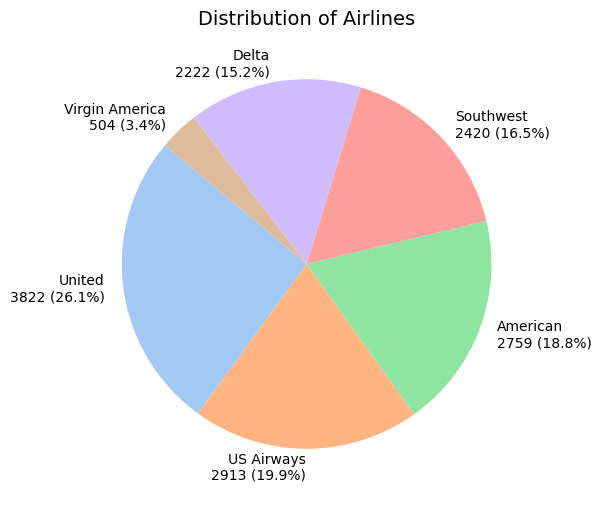

In [217]:
airline_counts = df['airline'].value_counts()
labels = airline_counts.index
counts = airline_counts.values
total = sum(counts)
labels_with_counts = [f'{label}\n{count} ({(count/total)*100:.1f}%)' for label, count in zip(labels, counts)]

print(total)

plt.figure(figsize=(8, 6))
plt.pie(counts, labels=labels_with_counts, startangle=140, colors=sns.color_palette('pastel'))
plt.title('Distribution of Airlines', fontsize=14)
plt.show()

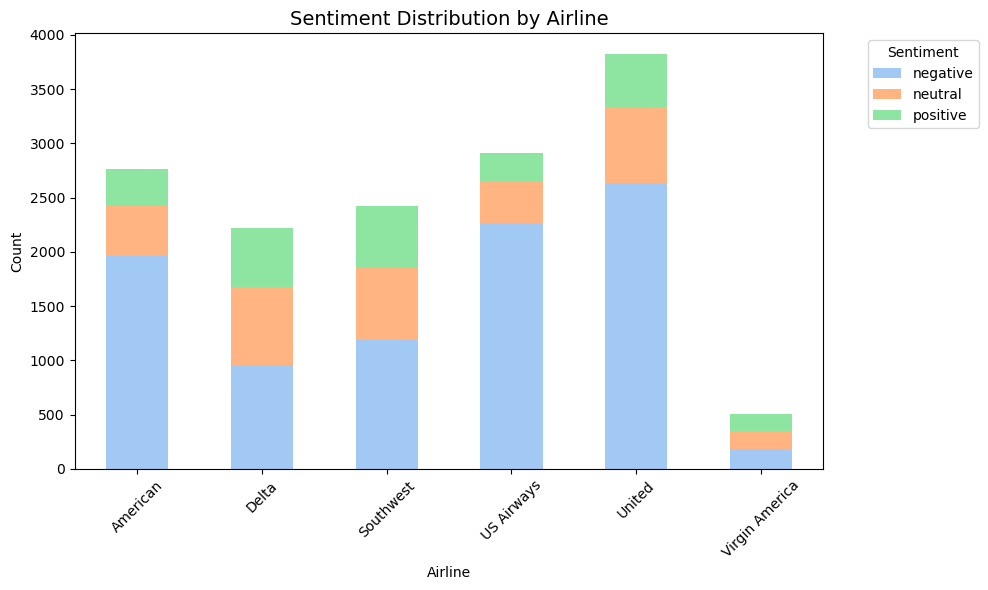

In [218]:
sentiment_by_airline = df.groupby('airline')['airline_sentiment'].value_counts().unstack().fillna(0)

plt.figure(figsize=(10, 6))

sentiment_by_airline.plot(kind='bar', stacked=True, color=sns.color_palette('pastel'), ax=plt.gca())

plt.title('Sentiment Distribution by Airline', fontsize=14)
plt.xlabel('Airline')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Sentiment', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

In [219]:
def sentiment_ratio_by_airline(dataframe: pd.DataFrame):
    sentiment_counts = dataframe.groupby(['airline', 'airline_sentiment']).size().unstack(fill_value=0)
    sentiment_ratios = sentiment_counts.div(sentiment_counts.sum(axis=1), axis=0)
    ratios_df = sentiment_ratios.reset_index()
    ratios_df.columns = ['airline', 'negative', 'neutral', 'positive']

    return ratios_df

sentiment_ratio_by_airline(df)

,airline,negative,neutral,positive
0,American,0.710402,0.167814,0.121783
1,Delta,0.429793,0.325383,0.244824
2,Southwest,0.490083,0.274380,0.235537
3,US Airways,0.776862,0.130793,0.092345
4,United,0.688906,0.182365,0.128728
5,Virgin America,0.359127,0.339286,0.301587


The `airline_sentiment_confidence` and `negative_reason_confidence` fields are intruiging. Obviously, they are an estimate of how reliable the respective metric is, but upon scouring the the Kaggle page and the related github repo, no information could be obtained as to how they were derived.

It might be beneficial to use these as weights for the corresponding metric. The fields appear to have different tiers of confidence. In the case of `airline_sentiment_confidence`, there appear to be a ranged tier somewhere around 67% confidence and the majority of entries have absolute condfidence at 100%. 

The `negative_region_confidence` appears to have four tiers, two absolute at either extremity of condidence, namely 0% and 100%, and then two intermediate tiers that range betweem 30-40% and 60-67% respectively.

Perhaps these confidence levels were assigned by the posters of the scraped twitter data themselves.

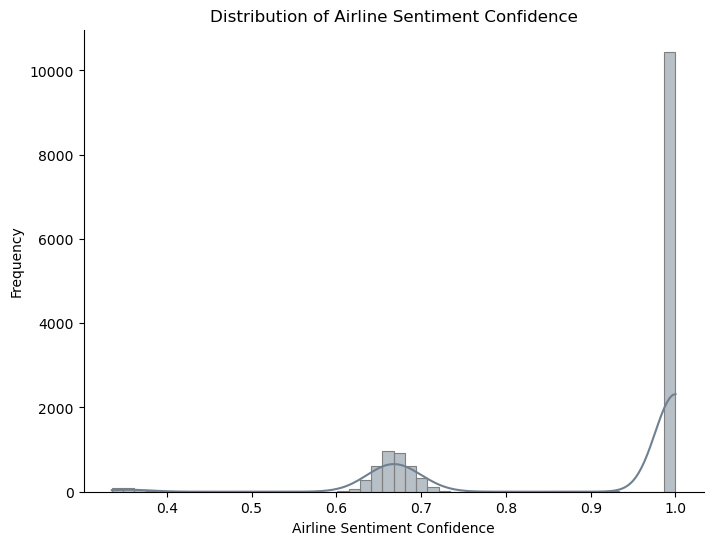

In [220]:
plt.figure(figsize=(8, 6))
sns.histplot(df['airline_sentiment_confidence'], kde=True, color='slategray', edgecolor='gray', bins=50)
plt.title('Distribution of Airline Sentiment Confidence')
plt.xlabel('Airline Sentiment Confidence')
plt.ylabel('Frequency')
sns.despine()
plt.show()

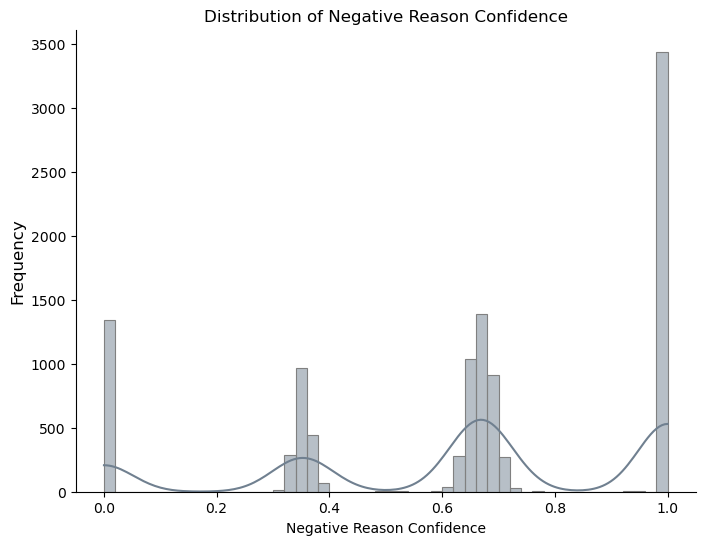

In [221]:
filtered_df = df[df['negative_reason_confidence'].notna()]

# Creating a minimalist and elegant histogram plot
plt.figure(figsize=(8, 6))
sns.histplot(filtered_df['negative_reason_confidence'], kde=True, color='slategray', edgecolor='gray', bins=50)
plt.title('Distribution of Negative Reason Confidence')
plt.xlabel('Negative Reason Confidence')
plt.ylabel('Frequency', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
sns.despine()
plt.show()

In [223]:
df['tweet_created'] = pd.to_datetime(df['tweet_created'])

datetime_min = df['tweet_created'].min()
datetime_max = df['tweet_created'].max()

datetime_range = datetime_max - datetime_min

datetime_min, datetime_max, datetime_range

(Timestamp('2015-02-16 23:36:05-0800', tz='UTC-08:00'),
 Timestamp('2015-02-24 11:53:37-0800', tz='UTC-08:00'),
 Timedelta('7 days 12:17:32'))

The duration of the scraped data was little more than a week.

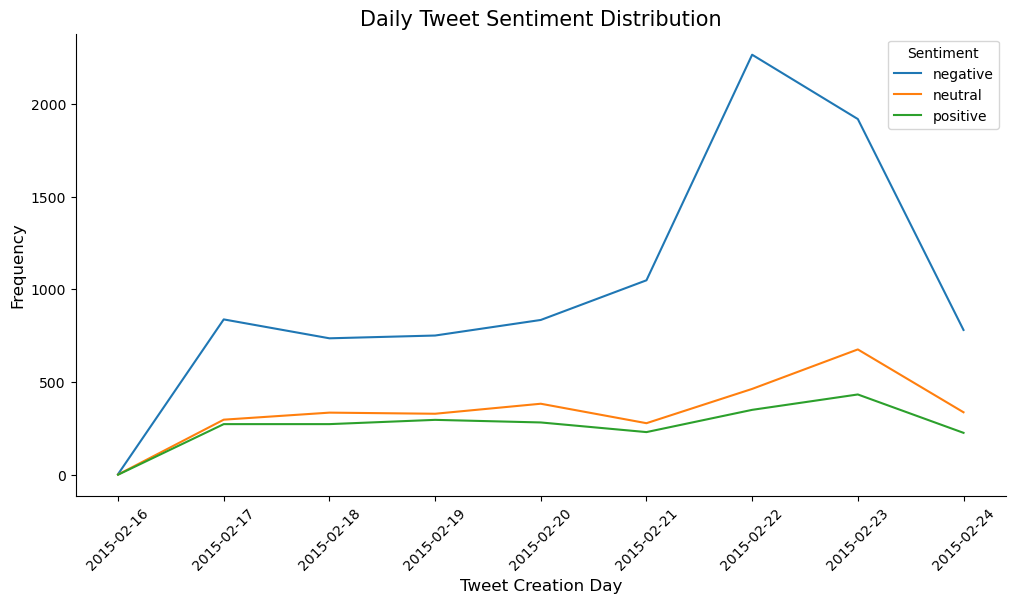

In [ ]:
grouped_df = df.groupby([df['tweet_created'].dt.date, 'airline_sentiment']).size().unstack(fill_value=0)
grouped_df = grouped_df.reset_index()


plt.figure(figsize=(12, 6))
for sentiment in grouped_df.columns[1:]:
    plt.plot(grouped_df['tweet_created'], grouped_df[sentiment], label=sentiment)

plt.title('Daily Tweet Sentiment Distribution', fontsize=15)
plt.xlabel('Tweet Creation Day', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Sentiment')
sns.despine()
plt.show()



The obvious assumption to make is that 21ste of Feb 2015 is a Friday, as it seems natural for airline traffic to increase, and thus the number of related tweets.

In [227]:
df['date'] = df['tweet_created'].dt.date
df['day_of_week_name'] = df['tweet_created'].dt.strftime('%A')
unique_days = df[['date', 'day_of_week_name']].drop_duplicates()
unique_days_sorted = unique_days.sort_values(by='date')

unique_days_sorted

,date,day_of_week_name
4324,2015-02-16,Monday
450,2015-02-17,Tuesday
390,2015-02-18,Wednesday
320,2015-02-19,Thursday
250,2015-02-20,Friday
173,2015-02-21,Saturday
120,2015-02-22,Sunday
29,2015-02-23,Monday
0,2015-02-24,Tuesday


It turns out that Friday was the 20th. In hindsight it would make sense for the tweets to lag a day after activity since people are inclined to only post about their fly experience after the fact. Hence, why activity only starts to decline near Tuesday. I'm also not entire convinced by the inteprebility of the above graph, as it doesn't really take the time of day into account.

In [ ]:
df['user_timezone'].unique()

array(['Eastern Time (US & Canada)', 'Pacific Time (US & Canada)',
       'Central Time (US & Canada)', 'America/New_York',
       'Atlantic Time (Canada)', 'Quito', nan,
       'Mountain Time (US & Canada)', 'Vienna', 'Caracas', 'Kuala Lumpur',
       'Brisbane', 'Arizona', 'London', 'Tehran', 'Alaska', 'Sydney',
       'Irkutsk', 'Santiago', 'Amsterdam', 'Tijuana', 'Abu Dhabi',
       'Central America', 'Edinburgh', 'Jerusalem', 'Hawaii', 'Paris',
       'Guam', 'New Delhi', 'Stockholm', 'America/Chicago', 'Berlin',
       'Madrid', 'Athens', 'Brussels', 'Taipei', 'Rome', 'Beijing',
       'Mexico City', 'Bern', 'Singapore', 'Indiana (East)', 'Melbourne',
       'Saskatchewan', 'Casablanca', 'Brasilia', 'Kyiv', 'Bucharest',
       'Greenland', 'Prague', 'New Caledonia', 'Bogota', 'Seoul',
       'Sarajevo', 'Wellington', 'Bangkok', 'Warsaw', 'Copenhagen',
       'Hong Kong', 'Guadalajara', 'Mid-Atlantic', 'Mazatlan',
       'Buenos Aires', 'America/Los_Angeles', 'Dublin', 'Lisbon',
 

At this point, I've done enough brief EDA to have inspired a couple of ideas on how I want to model the dataset. Since I'm at complete liberty to model the data the way I want, any future EDA will be geared towards the development of the model or facilitate the data transformation.